In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv('iris.csv')

## IRIS dataset

In [2]:
print(iris.shape)

(150, 5)


In [3]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
iris['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

## 2D scatter plot

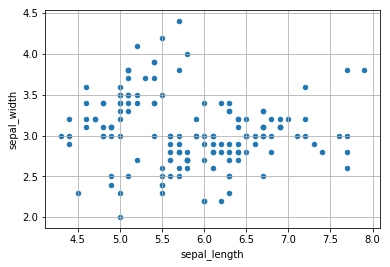

In [5]:
iris.plot(kind = 'scatter', x = 'sepal_length',y = 'sepal_width')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


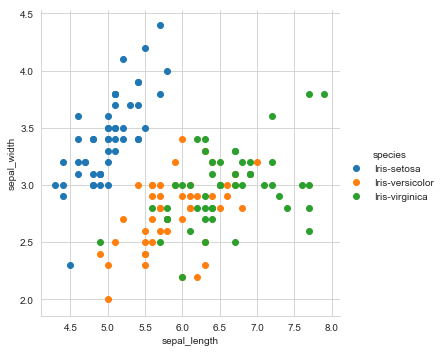

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'species',size = 5) \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend()
plt.show()

## 3D Scatter plot
https://plot.ly/pandas/3d-scatter-plots/

## (3.3) Pair - plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


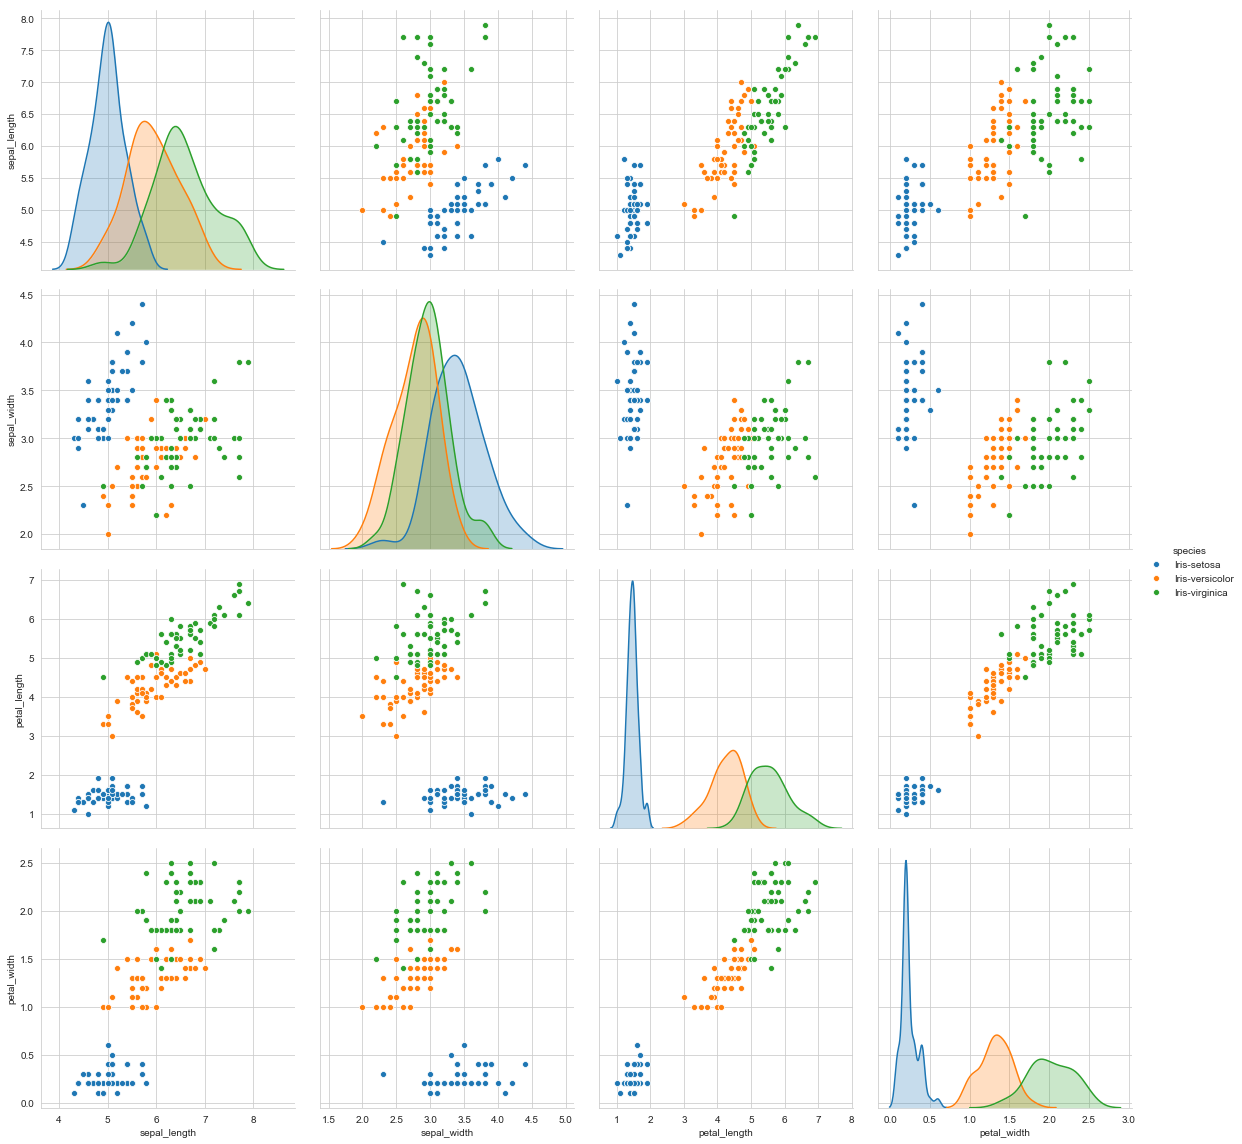

In [7]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris,hue = 'species',size = 4)
plt.show()

For the above data, pair plot are fairly to be understand if the variable are less(4c2 = 6).
If the variable are more than 6(6c2 = 15), deriving insights Pair plots will become a complex part

For more dimentions, methods like = PCA, t-SNE can be used to explore more insights

## 3.4 Histogram, PDF(Probability density function)

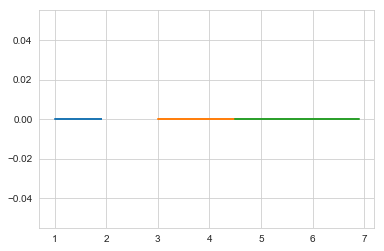

In [8]:
iris_setosa = iris.loc[iris['species'] == 'Iris-setosa'];
iris_virginica = iris.loc[iris['species']=='Iris-virginica'];
iris_versicolor = iris.loc[iris['species'] == 'Iris-versicolor'];
plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']))
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


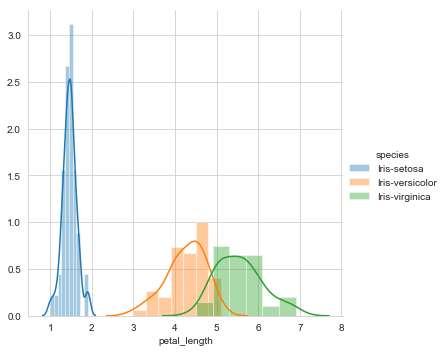

In [9]:
sns.FacetGrid(iris, hue = 'species',size = 5) \
    .map(sns.distplot,'petal_length') \
    .add_legend()
plt.show()

![For the above PDF](img/pdf.JPG)

## Univariate Analysis
Analysis with only single variable, choosing amoungs the best to get the better insights   
for an instance, we are going to work on Petal length of all the flower and dig in to plots like PDF, CDF, box-plots, violin plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


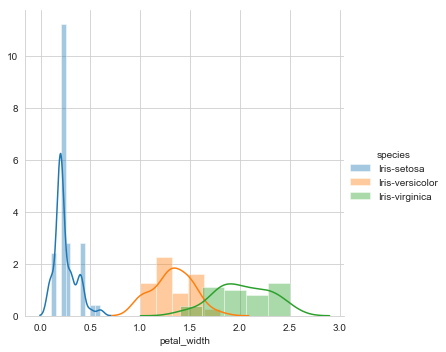

In [10]:
 sns.FacetGrid(iris, hue = 'species',size = 5) \
    .map(sns.distplot,'petal_width') \
    .add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


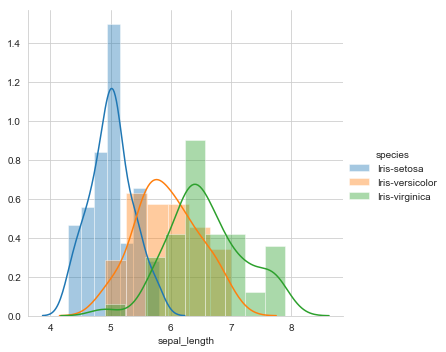

In [11]:
sns.FacetGrid(iris, hue = 'species',size = 5) \
    .map(sns.distplot,'sepal_length') \
    .add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


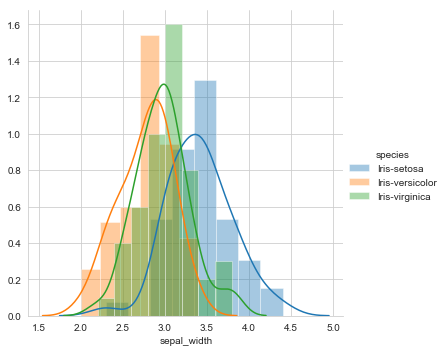

In [12]:
sns.FacetGrid(iris, hue = 'species',size = 5) \
    .map(sns.distplot,'sepal_width') \
    .add_legend()
plt.show()

From the above four chats,we can conclude that     
PL > PW >> SL >> SW  
So we can choose petal length's data distrubution for analysis.

## Cumulative distribution function(CDF)

![](img\cdf.JPG)
The above image is for below denotions

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


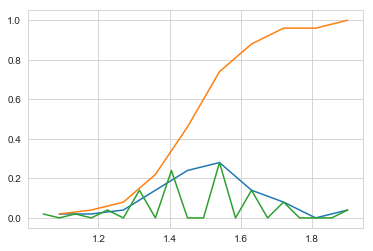

In [50]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'],
                                 bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Including Histogram
counts, bin_edges = np.histogram(iris_setosa['petal_length'],
                                bins = 20, density=True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.show()

comparing all three flower's Petal length with CDF and PDF

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


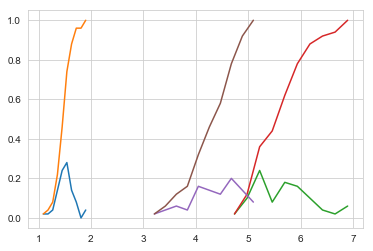

In [14]:
#Setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'],
                                 bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


#Virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'],
                                 bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'],
                                 bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

![](img/cdf2.JPG)

## 9.5 Mean, Variance and Std - Dev

In [18]:
# mean, variance and Standerd variation
print('Mean:')
print(np.mean(iris_setosa['petal_length']))
print(np.mean(np.append(iris_setosa['petal_length'],50)))
print(np.mean(iris_virginica['petal_length']))
print(np.mean(iris_versicolor['petal_length']))

#Std dev
print('\nStd - Dev')
print(np.std(iris_setosa['petal_length']))
print(np.std(iris_virginica['petal_length']))
print(np.std(iris_versicolor['petal_length']))



Mean:
1.464
2.4156862745098038
5.552
4.26

Std - Dev
0.17176728442867115
0.5463478745268441
0.4651881339845204


## Median

In [23]:
print('\nMedian')
print(np.median(iris_setosa['petal_length']))
#median with an 50 outlier
print(np.median(np.append(iris_setosa['petal_length'],50)))
print(np.median(iris_virginica['petal_length']))
print(np.median(iris_versicolor['petal_length']))


Median
1.5
1.5
5.55
4.35


## Percentile and Quantiles

In [39]:
# percentile = the nth percentile value denotes that all the other values are below the nth value
print('\nPercentile')
print(np.percentile(iris_setosa['petal_length'],90))
print(np.percentile(iris_virginica['petal_length'],90))
print(np.percentile(iris_versicolor['petal_length'],90))

#Quantiles - generally there are 25th, 50th, 75th, 100th percentiles, which helps us to understand the flow of data
print('\nQuantiles')
print(np.percentile(iris_setosa['petal_length'],np.arange(1,101,25))) # 25th,50th,75th,100th
print(np.percentile(iris_virginica['petal_length'],np.arange(0,100,25))) # 0th, 25th, 50th, 75th
print(np.percentile(iris_versicolor['petal_length'],np.arange(0,100,25))) # 0th, 25th, 50th, 75th



Percentile
1.7
6.3100000000000005
4.8

Quantiles
[1.049 1.4   1.5   1.6  ]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


## Median Absolute Deviation(MAD), Inter Quartile Range(IQR)

In [46]:
from statsmodels import robust
print('\nMedian Absolute Deviation:\n')
print(robust.mad(iris_setosa['petal_length']))
print(robust.mad(iris_virginica['petal_length']))
print(robust.mad(iris_versicolor['petal_length']))


Median Absolute Deviation:

0.14826022185056031
0.6671709983275211
0.5189107764769602


![title](img/IQR.JPG)
### IQR - 
In the above image, (75%-25% = )50% of values lies between 1.4 and 1.575 with diffrnce of 0.175

## Box Plots and Whiskers

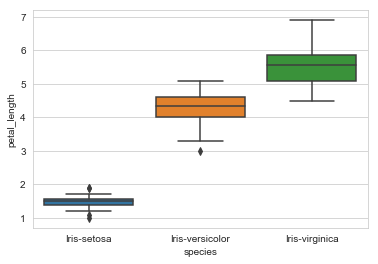

In [51]:
sns.boxplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

## Violin Plots

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


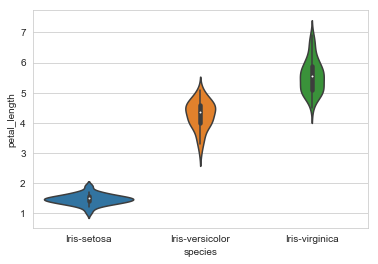

In [52]:
sns.violinplot(x = 'species',y = 'petal_length', data = iris, size = 8)
plt.show()

In the above plot, the middle line indicates the boxplot, where the centre white dot in the rectangular shape is 50th percentile,upper part of shape is 75th percentile and the bottom part is 25th percentile,The two threats, below and above indicates threshold.  
For all the three plots, the wide area denotes the volume of the data points lies at that range.

## Multivariate probability density - contour plot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


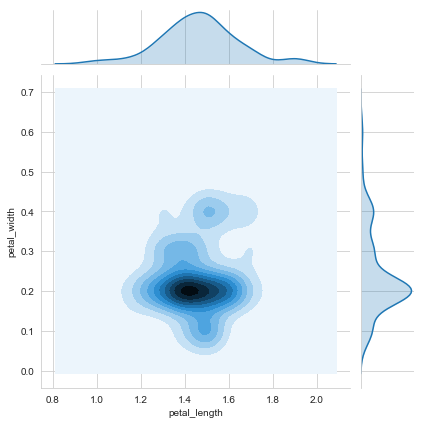

In [54]:
#2D - Density plot, contors - plot
sns.jointplot(x= 'petal_length',y = 'petal_width',
              data = iris_setosa, kind = 'kde')
plt.show()

# Key points - 
  1. Univariate - taking only one variable(1-D) and applying various methods to get the better insights.  
  Ex - we took Petal length for each flower and ploted PDF, CDF, box-plots, violin plots etc  
  2. Bivariate - With two different variables and working on it, looking at two variable at a time   
  EX - pair plots, scatter plots

# Exercise - 
## Need to work out with Haberman Cancer Survival Dataset